In [1]:
import numpy as np

from project.wfc.factory import Factory
from project.wfc.grid import Grid, Rect, Point
from project.visualization.grid_renderer import grid_renderer
from project.config import DATA_SOURCE
from project.wfc.repository import repository
from project.wfc.wfc import WFC
from project.wfc.judge import RandomJudge, GreedyJudge

In [2]:
factory = Factory(DATA_SOURCE)

patterns = factory.create_patterns()

rect = Rect(width=10, height=10)

grid = Grid(rect=rect, patterns=repository.get_all_patterns())

judge = RandomJudge()

wfc = WFC(grid=grid, judge=judge)

INFO - Validation Result: success



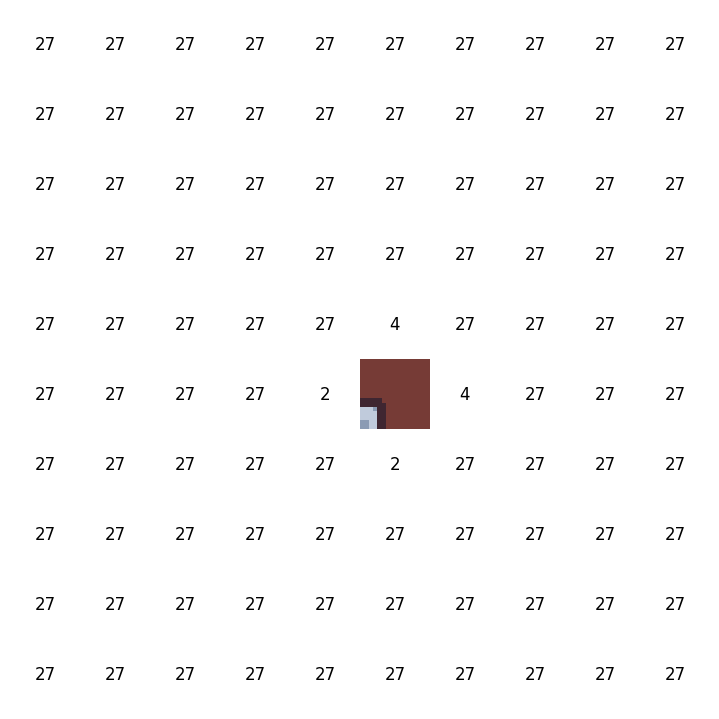

In [3]:
if wfc.step(early_stopping=True).success:
    grid_renderer.draw(grid=grid, show_borders=False, seed=42, show=True)

In [11]:
tries = 0
is_succeeded = False

while is_succeeded != True: 
    tries += 1
    is_succeeded = wfc.generate()

tries

6

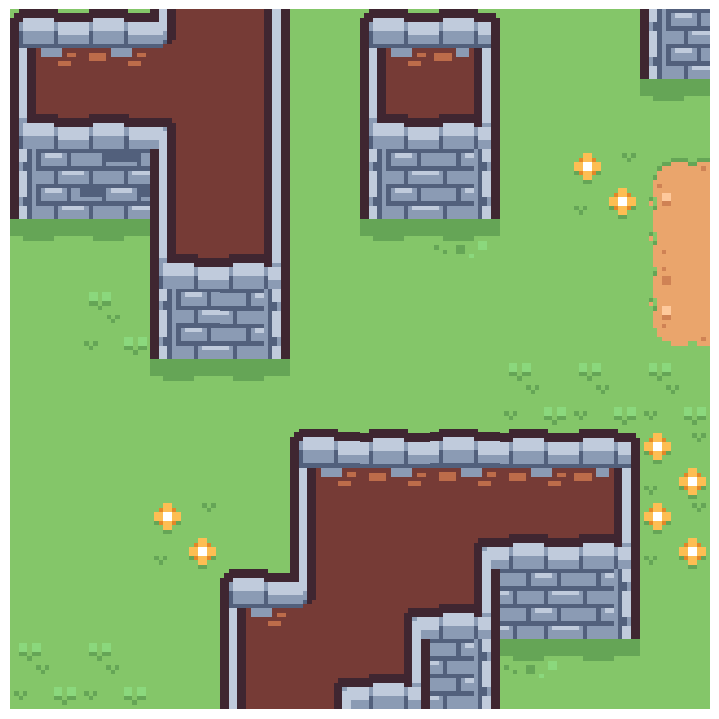

In [12]:
grid_renderer.draw(grid=grid, show_borders=False, seed=42)